In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('ggplot')

%matplotlib inline

In [2]:
survey_2018 = pd.read_csv('./resources/04_Kaggle_Survey_2018.csv')
survey_2018 = survey_2018.drop([0],axis=0)
survey_2018.head(2)

//anaconda2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [3]:
total_2018 = survey_2018['Time from Start to Finish (seconds)'].count()
total_2018

23859

In [4]:
ed_lvl_18 = survey_2018[['Q4']]
ed_lvl_18.columns = ['2018']
ed_lvl_18.head()

,2018
1,Doctoral degree
2,Bachelor’s degree
3,Master’s degree
4,Master’s degree
5,Master’s degree


In [5]:
ed_lvl_18['2018'].value_counts().index.tolist()
ed_lvl_18['2018'].value_counts().to_frame()
ed_lvl_18.head()

,2018
1,Doctoral degree
2,Bachelor’s degree
3,Master’s degree
4,Master’s degree
5,Master’s degree


In [6]:
survey_2017 = pd.read_csv('./resources/05_Kaggle_Survey_2017.csv', encoding='latin-1')
ed_lvl_17 = survey_2017[['FormalEducation']]
ed_lvl_17.columns = ['2017']
ed_lvl_17.head()

//anaconda2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,2017
0,Bachelor's degree
1,Master's degree
2,Master's degree
3,Master's degree
4,Doctoral degree


In [7]:
total_2017 = survey_2017['EmploymentStatus'].count()
total_2017

16716

In [8]:
ed_lvl_17['2017'].value_counts().index.tolist()
ed_lvl_17['2017'].value_counts().to_frame()

,2017
Master's degree,6273
Bachelor's degree,4811
Doctoral degree,2347
Some college/university study without earning a bachelor's degree,786
Professional degree,451
I did not complete any formal education past high school,257
I prefer not to answer,90


In [9]:
responses = ['Masters', 'Bachelors', 'Doctoral', 'Some College','Professional Degree', 'High School', 'prefer not to answer']
ed2018 = [10855,7083,3357,967,599,232,345]
ed2017 = [6273,4811,2347,786,451,257,90]

In [10]:
ed2017_pct = (ed2017/total_2017)*100
ed2018_pct = (ed2018/total_2018)*100
ed2017_pct

array([37.52692032, 28.78080881, 14.0404403 ,  4.70208184,  2.69801388,
        1.53744915,  0.53840632])

In [11]:
education_levels = pd.DataFrame({ 'Responses': responses, '2018': ed2018_pct, '2017': ed2017_pct})

education_levels

,Responses,2018,2017
0,Masters,45.496458,37.526920
1,Bachelors,29.686911,28.780809
2,Doctoral,14.070162,14.040440
3,Some College,4.052978,4.702082
4,Professional Degree,2.510583,2.698014
5,High School,0.972379,1.537449
6,prefer not to answer,1.445995,0.538406


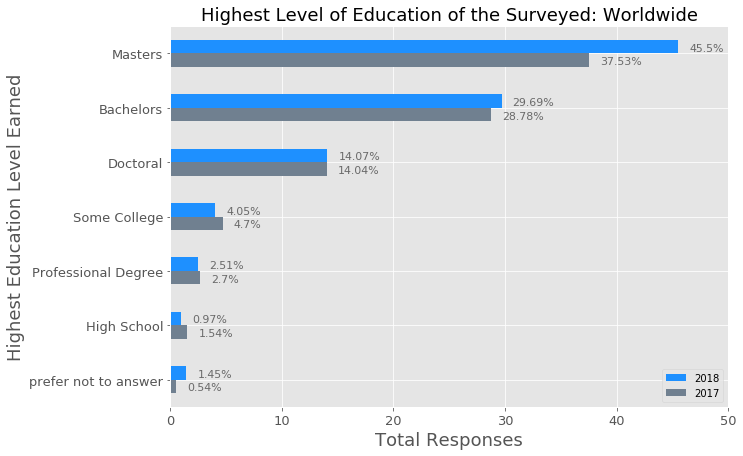

In [25]:
ax = education_levels[['2018', '2017']].plot(kind='barh',
              figsize=(10,7), color=['dodgerblue', 'slategray'], fontsize=13);

ax.set_alpha(.7)
ax.set_title("Highest Level of Education of the Surveyed: Worldwide",
fontsize=18)
ax.set_xlabel("Total Responses", fontsize=18)
ax.set_ylabel("Highest Education Level Earned", fontsize=18)
ax.set_xticks([0, 10, 20, 30, 40, 50])
ax.set_yticklabels(responses)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1, i.get_y()+.20, \
            str(round((i.get_width()), 2))+'%', fontsize=11, color='dimgrey')

fig = ax.get_figure()    

# invert for largest on top 
ax.invert_yaxis()

#plot & save graph 
plt.show()
fig.tight_layout()
fig.savefig("highest_lvl_edu_world.png")

In [26]:
#school_budget = merged_data.groupby(["school_name"]).mean()["budget"].map("${:,.0f}".format)
#reading_9th = merged_data.loc[merged_data["grade"] == "9th"].groupby("school_name")["reading_score"].mean()

lvl_18_us = survey_2018.loc[survey_2018['Q3'] == "United States of America"]
total_2018_us = lvl_18_us['Q3'].count()
total_2018_us 

4716

In [14]:
lvl_18_us = lvl_18_us[['Q4']]
lvl_18_us.columns = ['2018']
lvl_18_us.head()

,2018
1,Doctoral degree
3,Master’s degree
4,Master’s degree
12,Master’s degree
14,Bachelor’s degree


In [15]:
lvl_18_us['2018'].value_counts().index.tolist()
lvl_18_us['2018'].value_counts().to_frame()
lvl_18_us.head()

,2018
1,Doctoral degree
3,Master’s degree
4,Master’s degree
12,Master’s degree
14,Bachelor’s degree


In [16]:
lvl_18_us['2018'].value_counts().index.tolist()
lvl_18_us['2018'].value_counts().to_frame()

,2018
Master’s degree,2290
Bachelor’s degree,1242
Doctoral degree,858
Some college/university study without earning a bachelor’s degree,191
Professional degree,45
I prefer not to answer,22
No formal education past high school,14


In [17]:
lvl_17_us = survey_2017.loc[survey_2017['Country'] == "United States"]
total_2017_us = lvl_17_us['Country'].count()
total_2017_us 

4197

In [18]:
lvl_17_us = lvl_17_us[['FormalEducation']]
lvl_17_us.columns = ['2017']
lvl_17_us.head()

,2017
1,Master's degree
3,Master's degree
6,Master's degree
15,Master's degree
18,Bachelor's degree


In [19]:
lvl_17_us['2017'].value_counts().index.tolist()
lvl_17_us['2017'].value_counts().to_frame()

,2017
Master's degree,1685
Bachelor's degree,1004
Doctoral degree,786
Some college/university study without earning a bachelor's degree,207
Professional degree,49
I did not complete any formal education past high school,46
I prefer not to answer,13


In [20]:
us_responses = ['Masters', 'Bachelors', 'Doctoral', 'Some College','Professional Degree', 'High School', 'prefer not to answer']
us2018 = [2290,1242,858,191,45,14,22]
us2017 = [1685,1004,786,207,49,46,13]

In [21]:
us2017_pct = (us2017/total_2017_us)*100
us2018_pct = (us2018/total_2018_us)*100
us2017_pct

array([40.14772457, 23.92184894, 18.72766262,  4.93209435,  1.1675006 ,
        1.09602097,  0.30974506])

In [22]:
us_education_levels = pd.DataFrame({ 'Responses': us_responses, '2018': us2018_pct, '2017': us2017_pct})
us_education_levels

,Responses,2018,2017
0,Masters,48.558100,40.147725
1,Bachelors,26.335878,23.921849
2,Doctoral,18.193384,18.727663
3,Some College,4.050042,4.932094
4,Professional Degree,0.954198,1.167501
5,High School,0.296862,1.096021
6,prefer not to answer,0.466497,0.309745


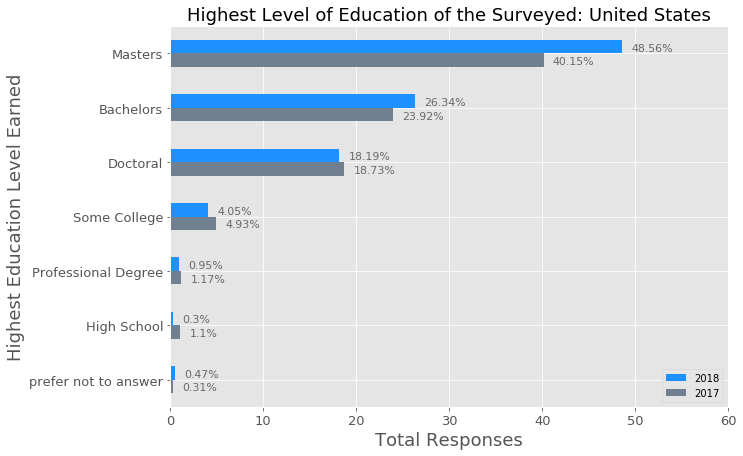

In [24]:
# define figure 
fig = ax.get_figure()

# graph plot 
ax = us_education_levels[['2018', '2017']].plot(kind='barh',
              figsize=(10,7), color=['dodgerblue', 'slategray'], fontsize=13);

# add lables and formats 
ax.set_alpha(.7)
ax.set_title("Highest Level of Education of the Surveyed: United States",
fontsize=18)
ax.set_xlabel("Total Responses", fontsize=18)
ax.set_ylabel("Highest Education Level Earned", fontsize=18)
ax.set_xticks([0, 10, 20, 30, 40, 50, 60])
ax.set_yticklabels(responses)
ax.legend(loc='lower right')
fig.tight_layout()

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1, i.get_y()+.20, \
            str(round((i.get_width()), 2))+'%', fontsize=11, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

# plot graph & 
plt.show()
fig.savefig("highest_lvl_edu_usa.png")